# MOWNIT
## Laboratorium 2b
Jakub Karbowski

In [1]:
using Plots
using Interact
using DataFrames

WebIO._IJuliaInit()

# Lagrange
Metoda Newtona

In [2]:
function lagrange(xs, ys)
    n = length(xs)
    
    A = [ys zeros(n, n-1)]
    
    for j = 2:n, i = j:n
        A[i,j] = (A[i,j-1] - A[i-1,j-1]) /
              (xs[i] - xs[1 + (i-1) - (j-1)])
    end
    
    P(x) = A[1,1] + sum([ A[k,k] * prod([ (x - xs[i])
                                   for i = 1:k-1 ])
                    for k = 2:n ])
end

# hermite compat
lagrange(xs, ys0, ys1) = lagrange(xs, ys0)

lagrange (generic function with 2 methods)

# Hermite
Identycznie jak Newton,
jedynie duplikujemy każdy węzeł
i kiedy w mianowniku wychodzi 0
stosujemy pochodną.

In [3]:
dupelems(xs, m) = foldl(vcat, [repeat([x], m) for x=xs])

function hermite(xs, ys0, ys1)    
    zxs = dupelems(xs, 2)
    zys0 = dupelems(ys0, 2)
    zys1 = dupelems(ys1, 2)
    
    n = length(xs)
    zn = length(zxs)
    
    A = [zys0 zeros(zn, zn-1)]
    
    for j = 2:zn, i = j:zn
        x1 = zxs[i]
        x2 = zxs[1 + (i-1) - (j-1)]
        A[i,j] = if x1 != x2
            (A[i,j-1] - A[i-1,j-1]) / (x1 - x2)
        else
            zys1[1 + (i-1) - (j-1)]
        end
    end
    
    P(x) = A[1,1] + sum([ A[k,k] * prod([ (x - zxs[i])
                                   for i = 1:k-1 ])
                    for k = 2:zn ])
end

hermite (generic function with 1 method)

# Węzły Czebyszewa
Dla przedziału $[-1,1]$:
$$
\begin{align}
x_k = \cos\left(\frac{2k-1}{2n}\pi\right)\text{,}\quad k=1,\dots,n
\end{align}
$$

Dla przedziału $[a,b]$:
$$
\begin{align}
x_k = \frac{a+b}{2} + \frac{b-a}{2} \cos\left(\frac{2k-1}{2n}\pi\right)\text{,}\quad k=1,\dots,n
\end{align}
$$

In [4]:
czeb(k, n) = cos((2k-1)/2n * π)
czeb(k, n, a, b) = (a+b)/2 + (b-a)/2 * czeb(k, n)

czeb (generic function with 2 methods)

# Błąd

In [5]:
maxerr(f, g, x) = maximum(@. abs(f(x) - g(x)) )
sqerr(f, g, x) = sum(@. ( f(x) - g(x) )^2 )

sqerr (generic function with 1 method)

# Moja funkcja

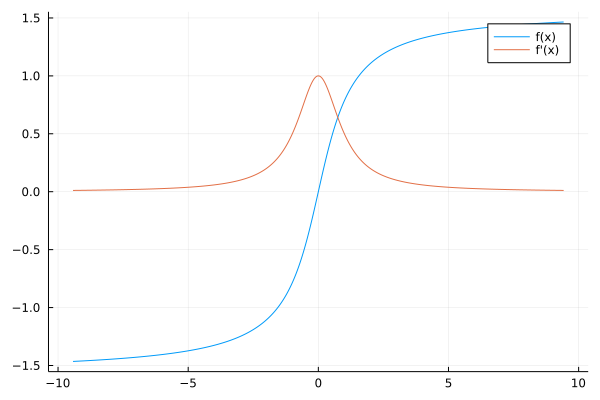

In [6]:
k = 2
m = 1

# f(x) = exp(-k*sin(m*x))+k*cos(m*x)
# df(x) = k*m*(cos(m*x)*(-exp(-k*sin(m*x))) - sin(m*x))
f(x) = atan(x)
df(x) = 1/(1+x^2)

xlo = -3pi
xhi = 3pi
xs = range(xlo, xhi, length=1000)

xcenter = (xlo + xhi) / 2

plot(
    xs,
    f.(xs),
    xlims=(xcenter + 1.1(xlo - xcenter), xcenter + 1.1(xhi - xcenter)),
    label="f(x)",
)

plot!(
    xs,
    df.(xs),
    label="f'(x)",
)

# Visualization
Czasami nie chce się aktualizować
po pierwszym włączeniu.

In [7]:
@manipulate for method=[:hermite, :lagrange], spacing=[:czeb, :even], n=3:23,
                legend=[:bottomright, :bottomleft, :topright, :topleft, :outerbottom]
    nodes = if spacing == :czeb
                czeb.(1:n, n, xlo, xhi)
            else
                range(xlo, xhi, length=n)
            end
    
    P = lagrange(nodes, f.(nodes))
    H = hermite(nodes, f.(nodes), df.(nodes))

    esq = sqerr(f, method == :hermite ? H : P, xs)
    
    xcenter = (xlo + xhi) / 2
    
    plot(
        xs,
        f.(xs),
        xlims=(xcenter + 1.1(xlo - xcenter), xcenter + 1.1(xhi - xcenter)),
        label="f(x)",
        legend = legend,
        title="sum err^2 = $(round(esq,digits=3))",
        line=:dash,
    )
    
    scatter!(
        nodes,
        f.(nodes),
        label="Nodes (n=$n, $spacing)",
    )
    
    method == :hermite && plot!(
        xs,
        H.(xs),
        label="Hermite",
        color=:purple,
    )
    
    method == :lagrange && plot!(
        xs,
        P.(xs),
        label="Lagrange",
    )
    
    plot!()
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["method"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :span), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text : key")))], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "click: function (){\$root.update(val)}, css: {'is-primary is-selected' : \$root.index() == val, 'interact-widget is-medium button ' : true}")))], Dict{Symbol, Any}(:attributes => ("data-bind" => "foreach : options_js"), :className => "buttons has-addons is-centered"))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[], Dict{Symbol, Any}())], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("options_js" => (Observable{Vector{OrderedDict}} with 1 listeners. Value:
OrderedDict[OrderedDict{String, Any}("key" => "hermite", "val" => 1, "id" => "idnB03EHMa"), OrderedDict{String, Any}("key" => "lagrange", "val" => 2, "id" => "id0G9USWgM")], nothing), "index" => (Observable{Any} with 2 listeners. Value:
1, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/carbon/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/carbon/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/carbon/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("options_js" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"options_js\"]()) ? (this.valueFromJulia[\"options_js\"]=true, this.model[\"options_js\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000016dee1900, Task (runnable) @0x000000016dee1900), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json

# Tabelki

In [8]:
function trial(n, params)
    dferr = DataFrame(n = [])
    [insertcols!(dferr, Symbol("err$i")=>[]) for i=eachindex(params)]
    for i = n
        row = Real[i]
        for (spacing, method) = params
            nodes = if spacing == :czeb
                         czeb.(1:i, i, xlo, xhi)
                     else
                         range(xlo, xhi, length=i)
                     end

            P = method(nodes, f.(nodes), df.(nodes))
            err = sqerr(f, P, xs) .|> round .|> Int
            push!(row, err)
        end
        push!(dferr, row)
    end
    dferr
end

trial (generic function with 1 method)

In [9]:
trialdf = trial(5:25, [
    (:czeb, lagrange),
    (:czeb, hermite),
])

,n,err1,err2
,Any,Any,Any
1,5,75,71
2,6,28,5
3,7,30,13
4,8,13,2
5,9,14,3
6,10,7,1
7,11,7,1
8,12,3,0
9,13,3,0


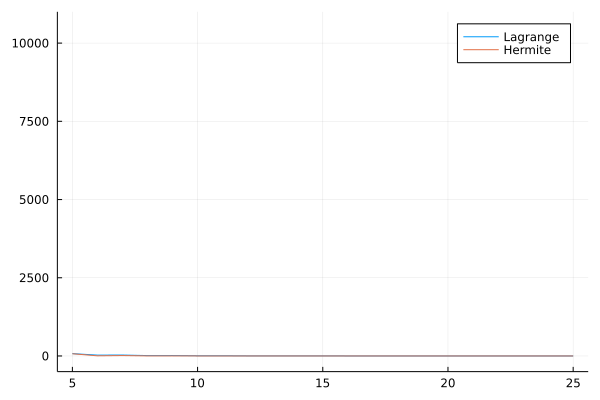

In [10]:
plot(
    trialdf[!, :n],
    [
        trialdf[!, :err1],
        trialdf[!, :err2],
    ],
    label=["Lagrange" "Hermite"],
    ylims=(-500, 11000),
)